# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

You can use patsy instead of pandas to handle the categorical variables if you like.

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [11]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [12]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv('../../assets/datasets/salary.dat', delim_whitespace=True)
# Take a look
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [13]:
# Apply value_counts() to series for "sx", "dg", and "rk"
df['sx'].value_counts()

male      38
female    14
Name: sx, dtype: int64

In [14]:
df['dg'].value_counts()

doctorate    34
masters      18
Name: dg, dtype: int64

In [15]:
df['rk'].value_counts()

full         20
assistant    18
associate    14
Name: rk, dtype: int64

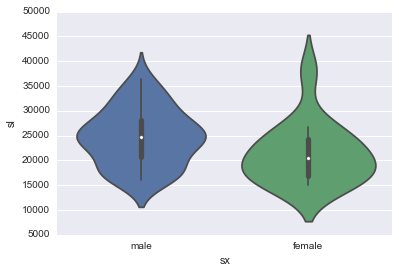

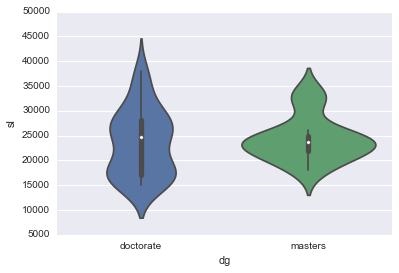

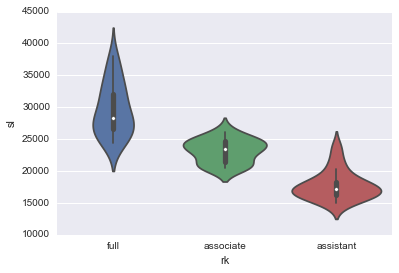

In [16]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df);
plt.show();

# Do the same for "dg" and "rk"
sns.violinplot(x='dg', y='sl', data=df);
plt.show();

sns.violinplot(x='rk', y='sl', data=df);
plt.show();

In [17]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

Index([u'sx', u'rk', u'yr', u'dg', u'yd', u'sl', u'sx_female', u'sx_male',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,male,full,13,doctorate,22,35350,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,male,full,10,doctorate,23,28200,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,female,full,7,doctorate,27,26775,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,male,full,19,masters,30,33696,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [23]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", model.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = model.predict(X)
print "Sample with regularization:", model.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", model.score(X, y)

# Did the results improve?

Sample: 0.846711398383
All data with sample model: 0.52060698566
Sample with regularization: 0.845173052658
All data with regularization model: 0.507963021774


r_square: 0.88630543814


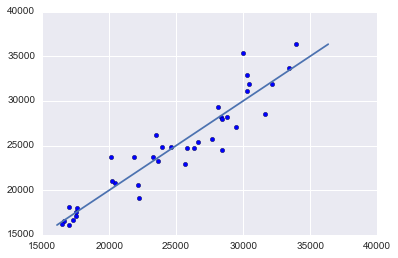

r_square: 0.69448811957


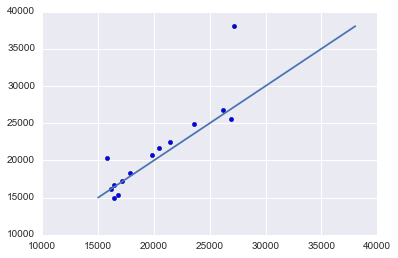

In [66]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# Apply the same model to the women and compare the model score
mask = df['sx'] == 'female'
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print X
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(model.predict(X),y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.781837240731


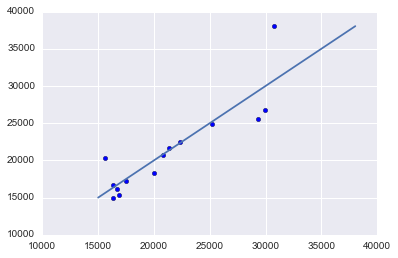

r_square: 0.657523429275


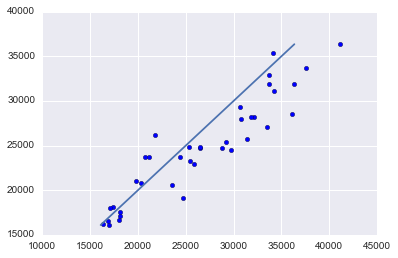

In [67]:
# What about the other order? Apply to women first

mask = df['sx'] == 'female'
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print X
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();


r_square: 0.755592692047


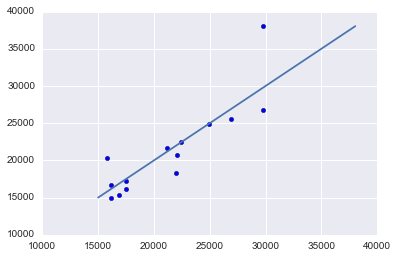

r_square: 0.726774045766


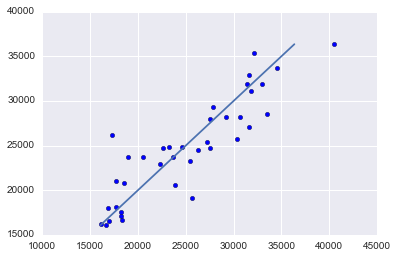

In [68]:
# This time use regularlization (RidgeCV)
lm = linear_model.RidgeCV(cv=10)
# Apply to women first

mask = df['sx'] == 'female'
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']
#print X
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();


### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

r_square: 0.876486548837


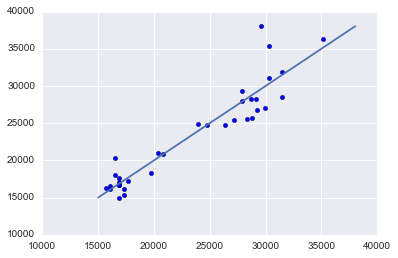

r_square: 0.6849888843


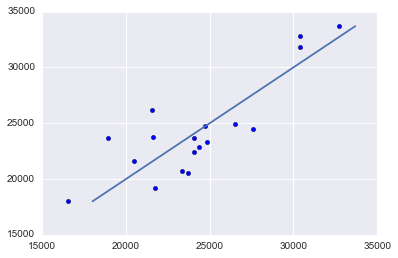

In [70]:
mask = (df["dg"] == "doctorate")
lm = linear_model.LinearRegression()
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["dg"] != "doctorate") # !=
lm = linear_model.LinearRegression()
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.797682614586


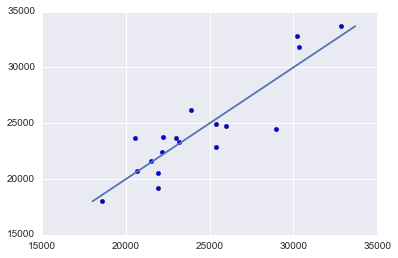

r_square: 0.745050571834


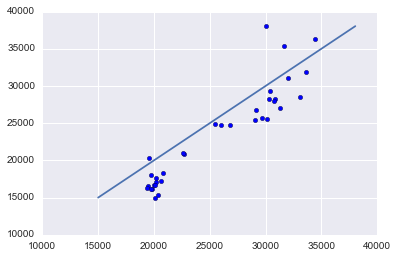

In [72]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=
lm = linear_model.LinearRegression()
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.797059287095


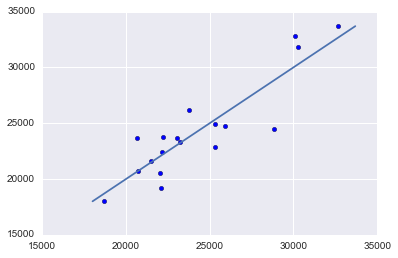

r_square: 0.751666341866


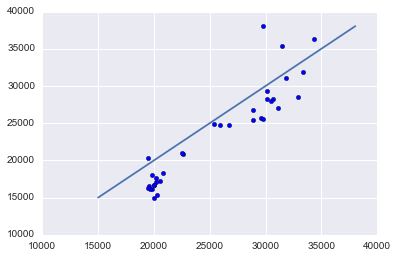

In [73]:
# With regularization
lm = linear_model.RidgeCV(cv=10, alphas=np.arange(0.1,25,0.2))
mask = (df["dg"] != "doctorate") # !=
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["dg"] == "doctorate")
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

r_square: 0.518546885368


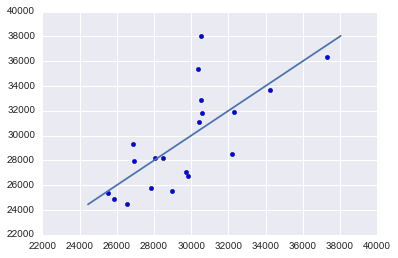

r_square: -18.353149193


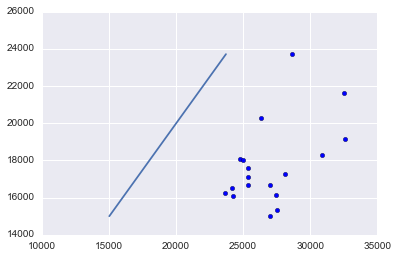

r_square: -7.45265423236


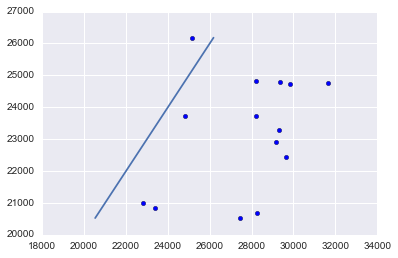

In [74]:
lm = linear_model.LinearRegression()
mask = (df["rk"] == "full") # First subset, there are two more
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.621136292896


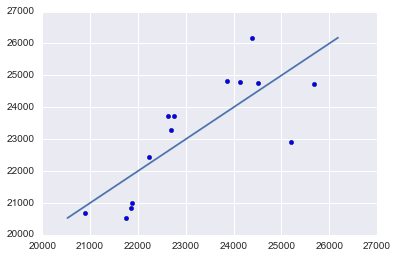

r_square: -7.96517263065


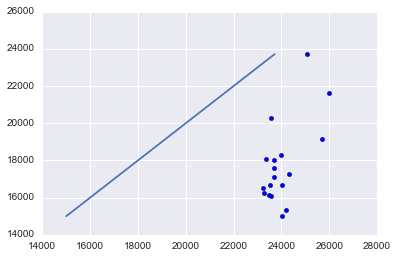

r_square: -2.60749883815


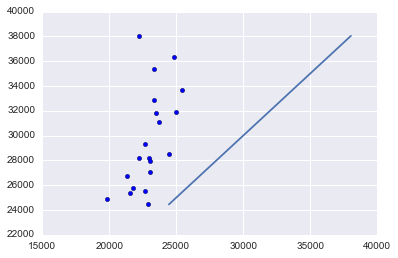

In [76]:
# The second permutation of three
mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.515603387509


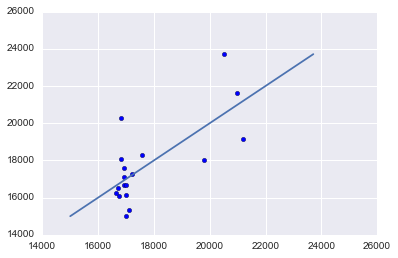

r_square: -8.39910384198


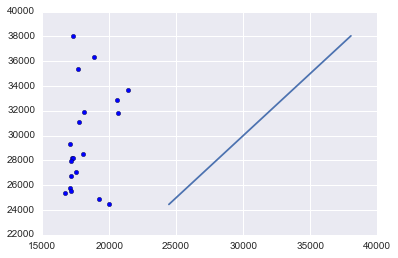

r_square: -5.80743845944


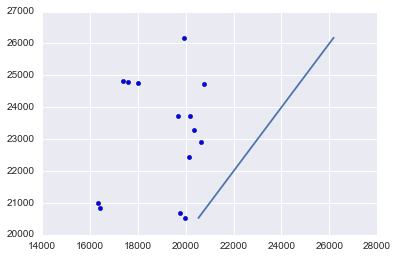

In [77]:
# The third permutation of three
mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# Results

How did the regularized models fare?

r_square: 0.471270133638


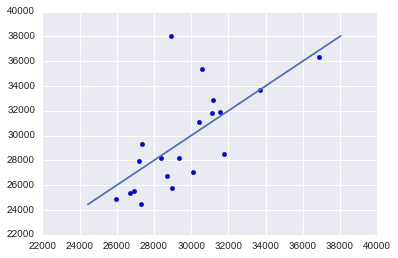

r_square: -12.6668801694


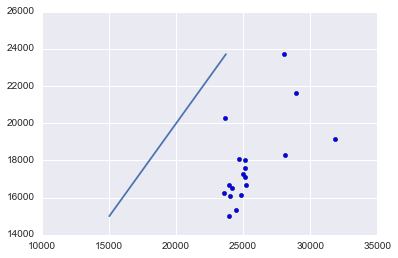

r_square: -7.60492726983


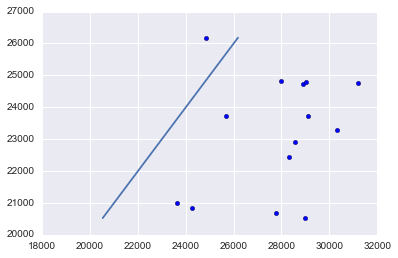

In [78]:
lm = linear_model.RidgeCV(cv=10, alphas=np.arange(0.1, 25,0.2))
mask = (df["rk"] == "full") # First subset, there are two more
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.522345719197


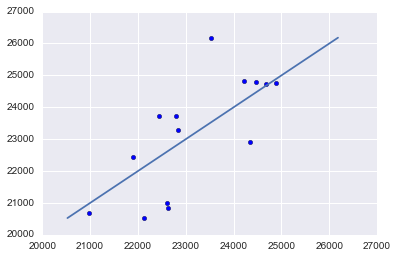

r_square: -7.4052073776


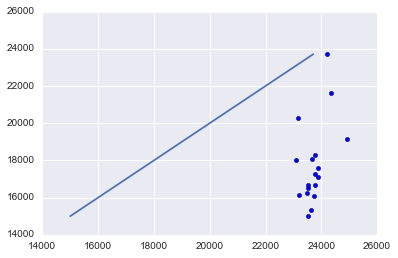

r_square: -2.22780586034


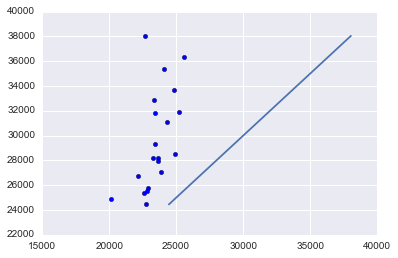

In [79]:
# The second permutation of three
mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.421953375944


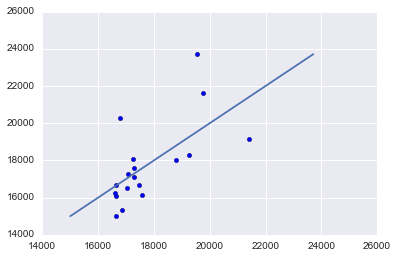

r_square: -4.60124397445


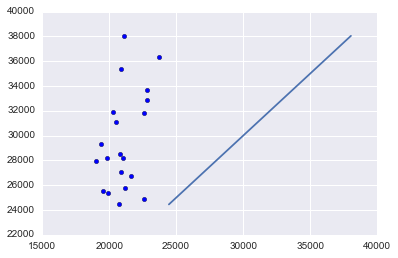

r_square: -4.29097793674


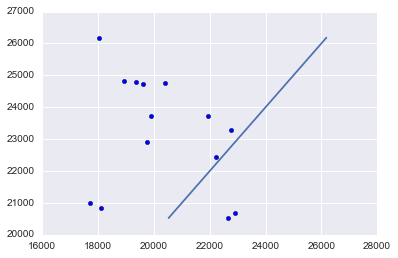

In [80]:
# The third permutation of three
mask = (df["rk"] == "assistant")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
#print X
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "full")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = (df["rk"] == "associate")
X = df[mask][[u'yr', u'yd',
       u'dg_doctorate', u'dg_masters', u'sx_female',
       u'sx_male']]
y = df[mask][u'sl']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

### Bonus

Try predicting "yd" by splitting the data on "sx".

r_square: 0.926177658276


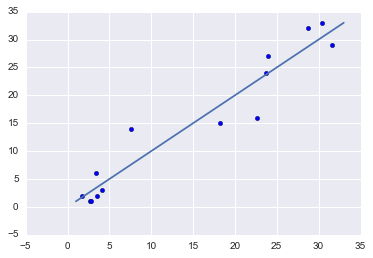

r_square: 0.0479508851501


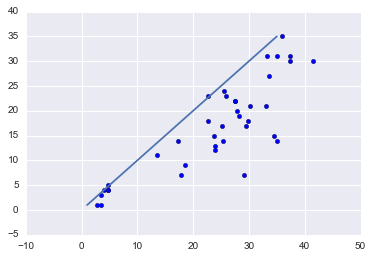

r_square: 0.834950307902


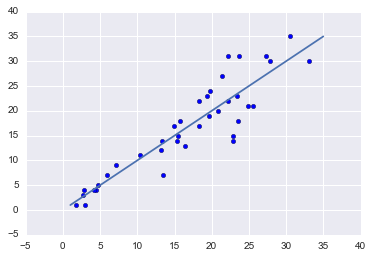

r_square: 0.834950307902


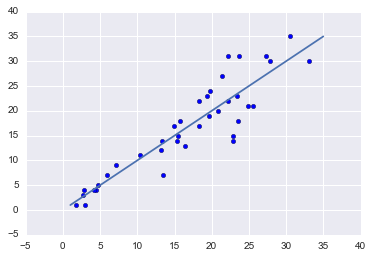

r_square: 0.492778744127


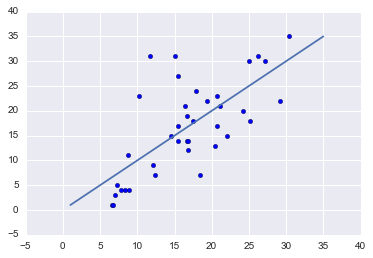

r_square: 0.492778744127


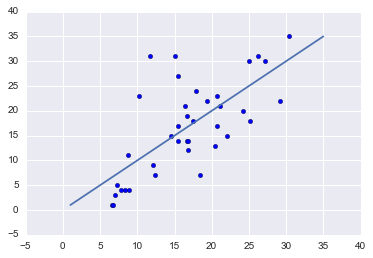

In [81]:
# Without regularization
mask = df["sx"] == "female"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']

## Fit a linear model here
## Plot the data
## and print the model score

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = df["sx"] == "male"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# With regularization, RidgeCV
# Without regularization

lm = linear_model.RidgeCV()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = df["sx"] == "male"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

# With regularization, LassoCV
# Without regularization

lm = linear_model.LassoCV()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = df["sx"] == "male"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

r_square: 0.835108948531


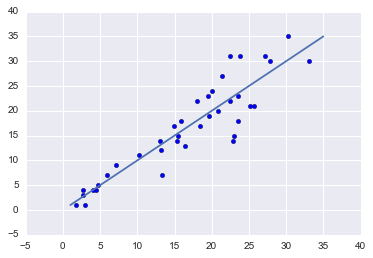

r_square: 0.57609191241


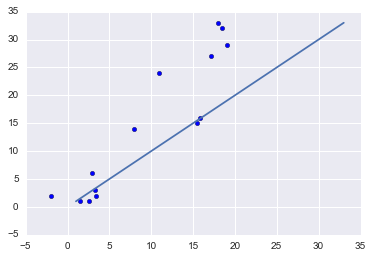

r_square: 0.904664798612


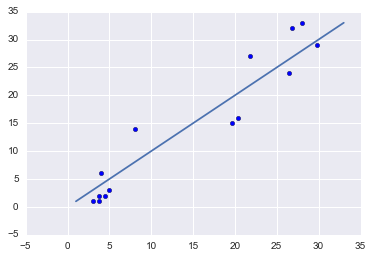

r_square: 0.904664798612


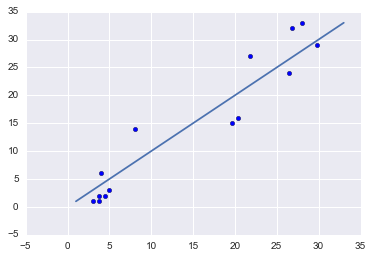

r_square: 0.360113499324


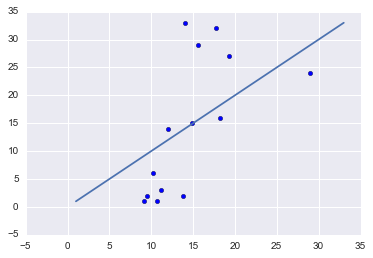

r_square: 0.360113499324


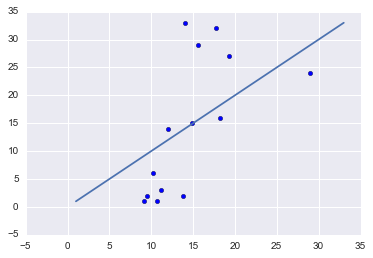

In [82]:
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']

## Fit a linear model here
## Plot the data
## and print the model score

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();


mask = df["sx"] == "female"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();


lm = linear_model.RidgeCV()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = df["sx"] == "female"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

lm = linear_model.LassoCV()
model = lm.fit(X, y)
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();

mask = df["sx"] == "female"
X = df[mask][[u'yr', u'sl',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
#print X
y = df[mask][u'yd']
predicted = model.predict(X)
print 'r_square: {}'.format(model.score(X,y))
plt.scatter(predicted,y);
plt.plot([y.min(), y.max()], [y.min(), y.max()]);
plt.show();